(polytomous-notebook)=
# Modelli per Risposte Politomiche 

In questo capitolo, esamineremo i modelli per risposte politomiche. La nostra esplorazione inizia con un passo indietro, riconoscendo l'origine e l'evoluzione di questi modelli dal loro antenato più semplice: il modello dicotomico. Finora ci siamo affidati a quest'ultimo per interpretare risposte che cadevano in una dicotomia di 'corretto' o 'errato', 'accordo' o 'disaccordo'. Il passaggio ai modelli politomici ci permette di considerare risposte che vanno oltre il semplice sì o no. In un test di matematica, ad esempio, possiamo ora riconoscere e attribuire valore a risposte parzialmente corrette. In un questionario sulla personalità, siamo in grado di misurare diversi gradi di accordo o intensità di un tratto, piuttosto che limitarci a una risposta binaria.

Questi modelli politomici si presentano come estensioni naturali del modello Rasch. Nel corso di questo capitolo, esploreremo in dettaglio tre modelli politomici chiave: il modello a Crediti Parziali, il modello a Scala di Valutazione e il modello di Risposta Graduata. 

In [41]:
suppressPackageStartupMessages({
    library("tidyverse")
    library("eRm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("WrightMap")
    library("latex2exp")
    library("kableExtra")
    library("lavaan")
    })

## Modello a Crediti Parziali

Nel Modello a Crediti Parziali (PCM) dell'IRT, la variabile latente, tipicamente indicata come $\theta$, è  assunta come una variabile continua con una distribuzione normale (gaussiana) nell'insieme della popolazione. Questo valore $\theta$ rappresenta il tratto latente che il modello cerca di misurare, come l'abilità di un rispondente.

Quando si utilizza una scala Likert, che è una scala di risposta ordinale tipicamente usata per rilevare atteggiamenti o opinioni, il PCM si adatta a gestire le risposte categoriali multiple attraverso la discretizzazione implicita dell'output del modello.

Nel PCM, la variabile latente $\theta$ rimane continua e non viene discretizzata. Questa rappresenta il livello dell'attributo (ad esempio, abilità o atteggiamento) che il modello cerca di stimare.

Le risposte degli individui, tuttavia, sono discrete e ordinate (es. 1, 2, 3, 4, 5 su una scala Likert). Ogni categoria di risposta ha associato un parametro di soglia che determina il passaggio da una categoria all'altra. Più alto è il valore di $\theta$ di un individuo, maggiore è la probabilità che egli scelga una categoria di risposta più alta.

Il modello calcola la probabilità che un individuo con un certo valore di $\theta$ risponda in una certa categoria $k$ di un item. La funzione di probabilità utilizzata dipende dai parametri di difficoltà dei passaggi tra le categorie. 

In sintesi, nel PCM la variabile latente $\theta$ rimane continua e distribuita normalmente, mentre le risposte vengono modellate come discrete attraverso le funzioni di probabilità che dipendono dal valore di $\theta$ e dalle soglie tra le categorie. Questo permette di trattare dati ordinali mantenendo un'interpretazione chiara del tratto latente come una variabile continua.

Il PCM fa parte della famiglia di modelli Rasch e condivide quindi le caratteristiche distintive di quella famiglia: parametri separabili per persona e item, e statistiche sufficienti. Queste caratteristiche consentono la proprietà dell'"oggettività specifica" di rispondenti e item (Rasch, 1977).

### Curve Caratteristiche delle Categorie

Per descrivere le probabilità di risposta alle diverse categorie, i modelli politomici utilizzano più di una Curva Caratteristica dell'Item (ICC). Di conseguenza, questi modelli presentano una curva per ogni categoria, denominate Curve Caratteristiche delle Categorie (CCC). Ad esempio, per un item con quattro categorie di risposta, si rappresentano quattro CCC.

```{figure} ../images/debelak_fig_11_1.png
---
height: 320px
name: bayes-workflow-fig
---
Curve Caratteristiche delle Categorie per un item con parametri di soglia $ \delta_{i1}, \delta_{i2}, \delta_{i3} $. I numeri in grassetto indicano la categoria con la più alta probabilità di risposta.  (Figura tratta da {cite:t}`debelak2022introduction`).
```

In un modello di risposta politomica, come il Modello di Credito Parziale (PCM), ogni categoria dispone di una propria curva caratteristica che illustra la probabilità di essere selezionata all'aumentare o al diminuire dell'abilità del rispondente.

Queste curve sono fondamentali per comprendere visivamente e intuitivamente come variano le probabilità di selezionare determinate categorie al variare dell'abilità del rispondente. Le curve delle categorie intermedie tendono a presentare una forma a campana, indicando l'esistenza di un intervallo di abilità in cui tali categorie sono più probabili, mentre le curve delle categorie estreme (la più bassa e la più alta) mostrano una tendenza crescente o decrescente, rispettivamente.

Le soglie di transizione, rappresentate nei modelli come $\delta_{i1}, \delta_{i2}, \delta_{i3}$ e così via, sono punti critici lungo l'asse dell'abilità dove la probabilità di scegliere due categorie adiacenti è equiprobabile. Questi punti di soglia delineano graficamente il momento in cui un rispondente, a un dato livello di abilità, passa da una probabilità maggiore di scegliere una categoria inferiore a una superiore, o viceversa.

La rappresentazione grafica di queste soglie nelle CCC è essenziale perché permette ai ricercatori di identificare con precisione le abilità specifiche necessarie per transire da una categoria di risposta all'altra. In questo modello, i parametri di soglia, quali $\delta_{i1}$ e $\delta_{i2}$, assumono un ruolo simile alla difficoltà dell'item nel modello di Rasch, definendo il livello di abilità al quale la probabilità di scegliere una categoria equivale a quella di selezionarne un'altra.

Un aspetto cruciale del PCM e delle relative CCC è che la somma delle probabilità di tutte le categorie di risposta, per un dato livello di abilità, risulta sempre uguale a uno. Questo assicura la validità probabilistica del modello e garantisce una rappresentazione adeguata e completa di tutte le possibili risposte. Praticamente, ciò significa che, per qualsiasi valore di abilità, la distribuzione delle probabilità tra le diverse categorie è completa ed esaustiva.

Le CCC rappresentano uno strumento visuale potente per analizzare e interpretare come vari gruppi di individui reagiscono agli item di un test. Ad esempio, possono essere utilizzate per identificare se alcuni item risultano eccessivamente semplici o difficili per determinati gruppi di studenti, o per rilevare punti di ambiguità nelle domande che conducono a una selezione inattesa delle categorie di risposta.

## Una Applicazione Concreta

Utilizzeremo i dati di un recente articolo che indaga l'"effetto dell'elevazione iniziale" (Anvari et al., 2022), e ci concentreremo sui 10 item negativi dalla PANAS. I dati sono disponibili sul sito web OSF.

In [3]:
df.all <- read_csv("https://osf.io/download/6fbr5/")
# if you have issues with the link, please try downloading manually using the same URL as above
# and read the file from your local drive.

# subset items and demographic variables
df <- df.all %>%
    select(
        starts_with("PANASD2_1"),
        starts_with("PANASD2_20"),
        age, Sex, Group
    ) %>%
    select(!PANASD2_10_Active) %>%
    select(!PANASD2_1_Attentive)

Rows: 1856 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): id, RecordedDate.Recruitment, Group, RecordedDate.D2, Anchor.Posit...
dbl (62): Finished.D2, AnxietyD2_OnEdge, AnxietyD2_Uneasy, AnxietyD2_Anxious...
lgl  (2): Finished.Recruitment, Finished.D1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
glimpse(df)

Rows: 1,856
Columns: 13
$ PANASD2_11_Distressed <dbl> 2, 2, 2, 1, 2, 2, 4, 1, 1, 3, 1, 4, 2, 4, 4, 1, …
$ PANASD2_12_Upset      <dbl> 1, 1, 4, 1, 1, 5, 2, 1, 2, 2, 2, 3, 1, 3, 5, 1, …
$ PANASD2_13_Hostile    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, …
$ PANASD2_14_Irritable  <dbl> 1, 1, 3, 1, 2, 5, 3, 1, 2, 4, 2, 3, 1, 2, 3, 1, …
$ PANASD2_15_Scared     <dbl> 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 4, 4, 1, …
$ PANASD2_16_Afraid     <dbl> 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 4, 4, 1, …
$ PANASD2_17_Ashamed    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, …
$ PANASD2_18_Guilty     <dbl> 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 3, 1, …
$ PANASD2_19_Nervous    <dbl> 1, 1, 2, 1, 2, 4, 4, 1, 1, 4, 2, 4, 2, 1, 5, 1, …
$ PANASD2_20_Jittery    <dbl> 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 4, 1, …
$ age                   <dbl> 27, 32, 21, 27, 20, 22, 23, 25, 21, 26, 38, 36, …
$ Sex                   <chr> "Male", "Male", "Female", "Male", "Male", "Male"…
$ Group         

Dato che ci sono solo 5 partecipanti che utilizzano etichette diverse da Femminile/Maschile (troppo pochi per un'analisi statistica robusta), li rimuoveremo per avere un dataset completo per tutte le variabili in questo esempio.

In [18]:
df <- df %>%
    filter(Sex %in% c("Female", "Male"))

In [19]:
df_num <- df[, 1:10]

Adattiamo ai dati il Partial Credit Model:

In [20]:
PC_model <- PCM(df_num)

Warning message:
“
The following items have no 0-responses:
PANASD2_11_Distressed PANASD2_12_Upset PANASD2_13_Hostile PANASD2_14_Irritable PANASD2_15_Scared PANASD2_16_Afraid PANASD2_17_Ashamed PANASD2_18_Guilty PANASD2_19_Nervous PANASD2_20_Jittery
Responses are shifted such that lowest category is 0.”


In [21]:
summary(PC_model)


Results of PCM estimation: 

Call:  PCM(X = df_num) 

Conditional log-likelihood: -13822.07 
Number of iterations: 110 
Number of parameters: 39 

Item (Category) Difficulty Parameters (eta): with 0.95 CI:
                         Estimate Std. Error lower CI upper CI
PANASD2_11_Distressed.c2   -1.719      0.081   -1.878   -1.559
PANASD2_11_Distressed.c3   -1.595      0.094   -1.779   -1.411
PANASD2_11_Distressed.c4    0.000      0.148   -0.289    0.289
PANASD2_12_Upset.c1        -0.520      0.065   -0.647   -0.393
PANASD2_12_Upset.c2        -0.595      0.081   -0.754   -0.436
PANASD2_12_Upset.c3        -0.179      0.101   -0.376    0.019
PANASD2_12_Upset.c4         1.105      0.149    0.813    1.397
PANASD2_13_Hostile.c1       0.001      0.065   -0.126    0.127
PANASD2_13_Hostile.c2       0.189      0.084    0.024    0.353
PANASD2_13_Hostile.c3       1.130      0.120    0.894    1.365
PANASD2_13_Hostile.c4       3.072      0.225    2.631    3.513
PANASD2_14_Irritable.c1    -1.101    

Esaminiamo la Wright Map, ovvero un grafico bidimensionale che mostra sia le abilità dei rispondenti sia le difficoltà degli item su una scala comune. Questa mappa aiuta a comprendere come si rapportano le abilità dei rispondenti alle difficoltà degli item.

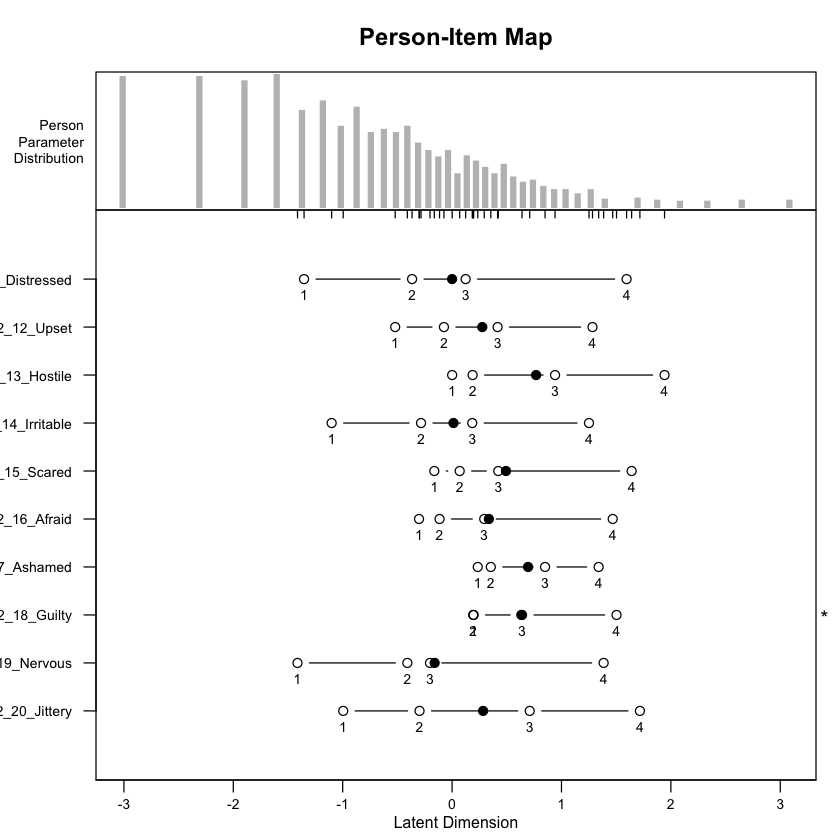

In [22]:
plotPImap(PC_model)

Esaminiamo le CCC per ciascun item.

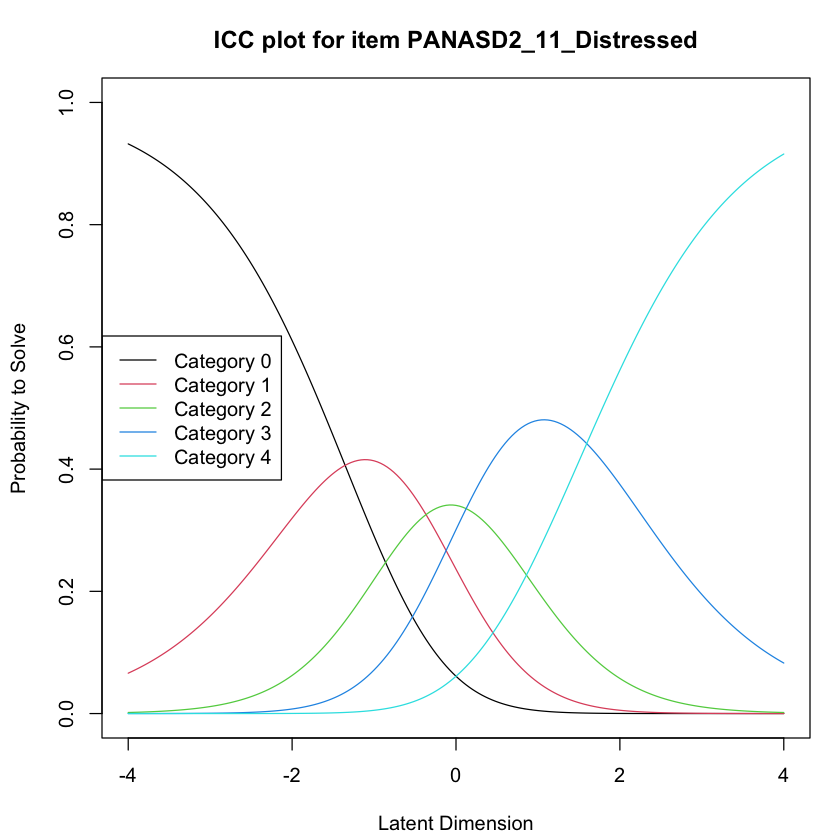

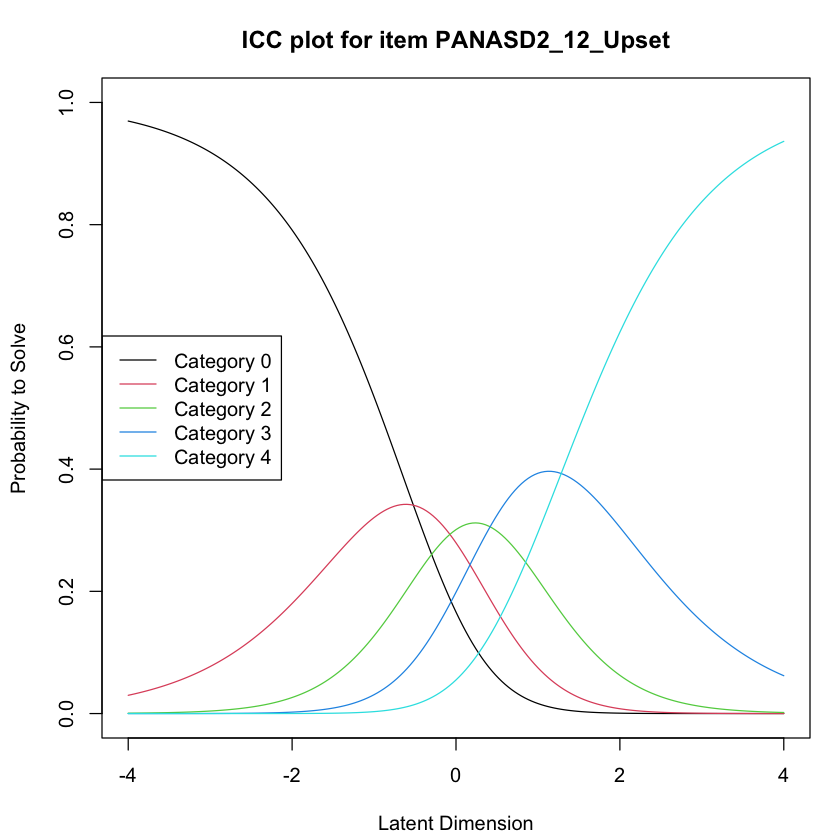

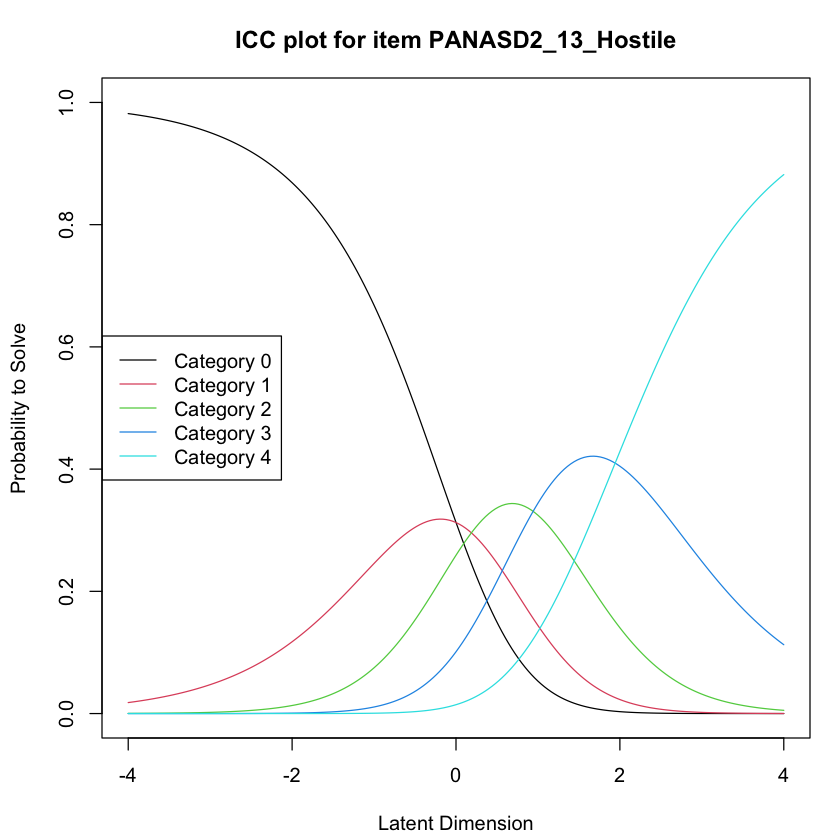

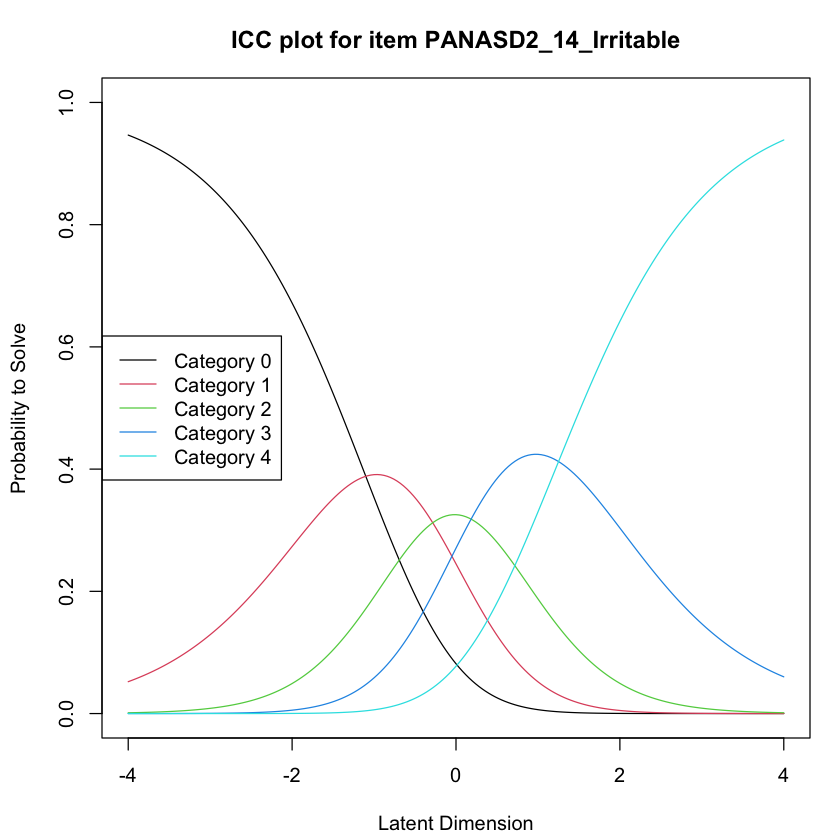

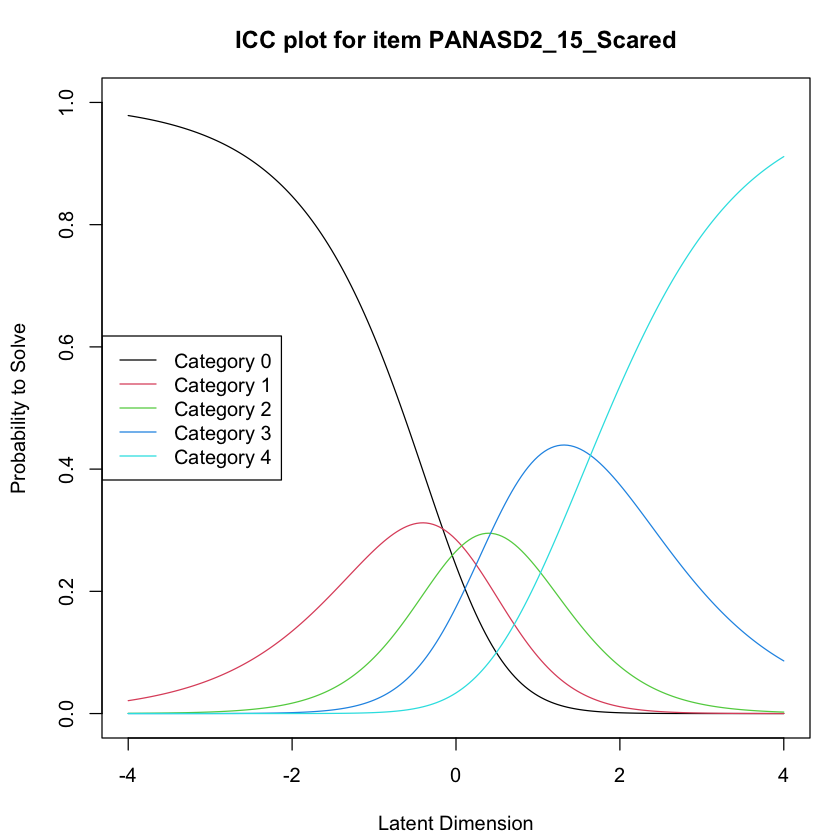

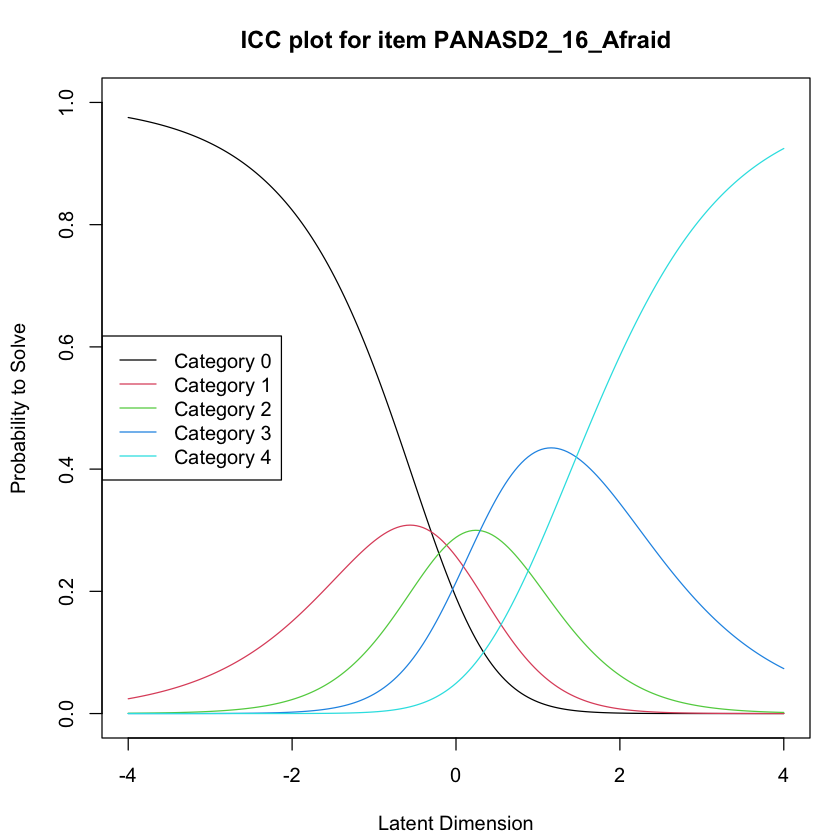

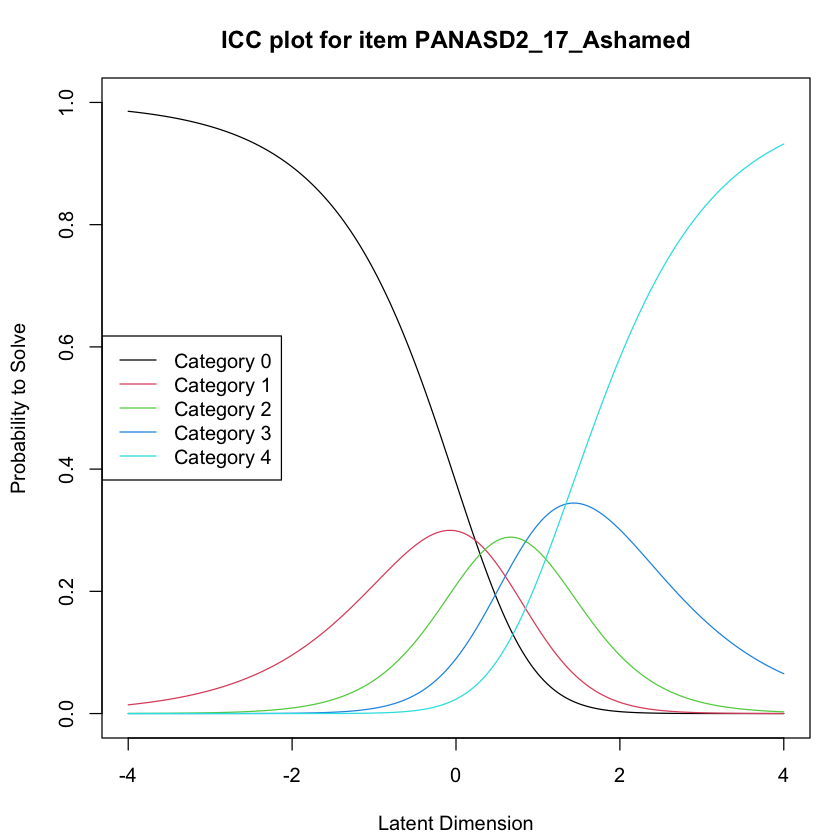

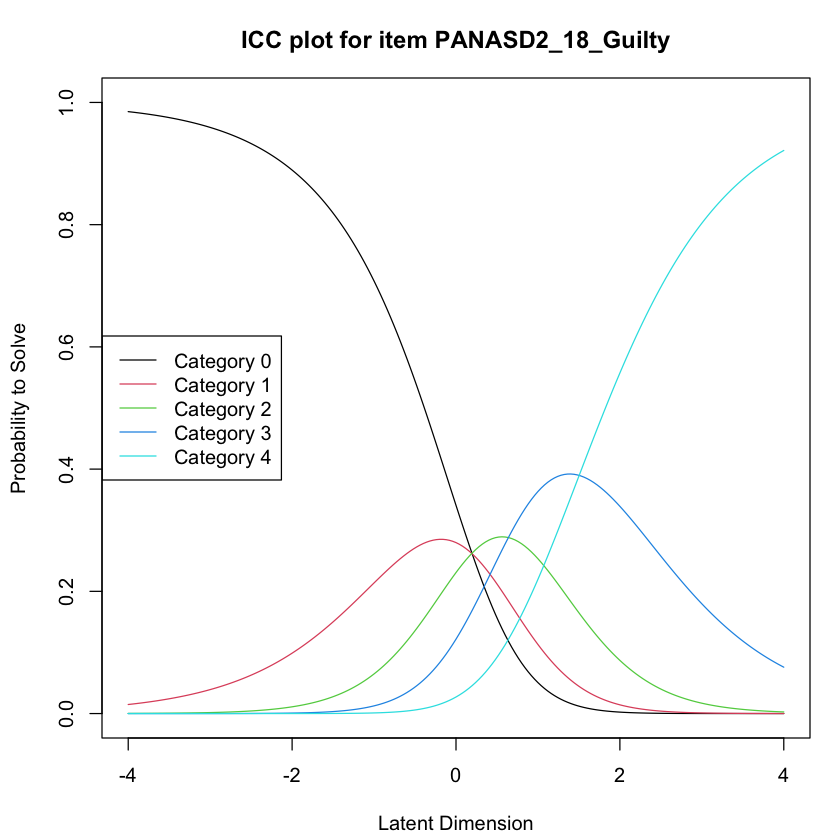

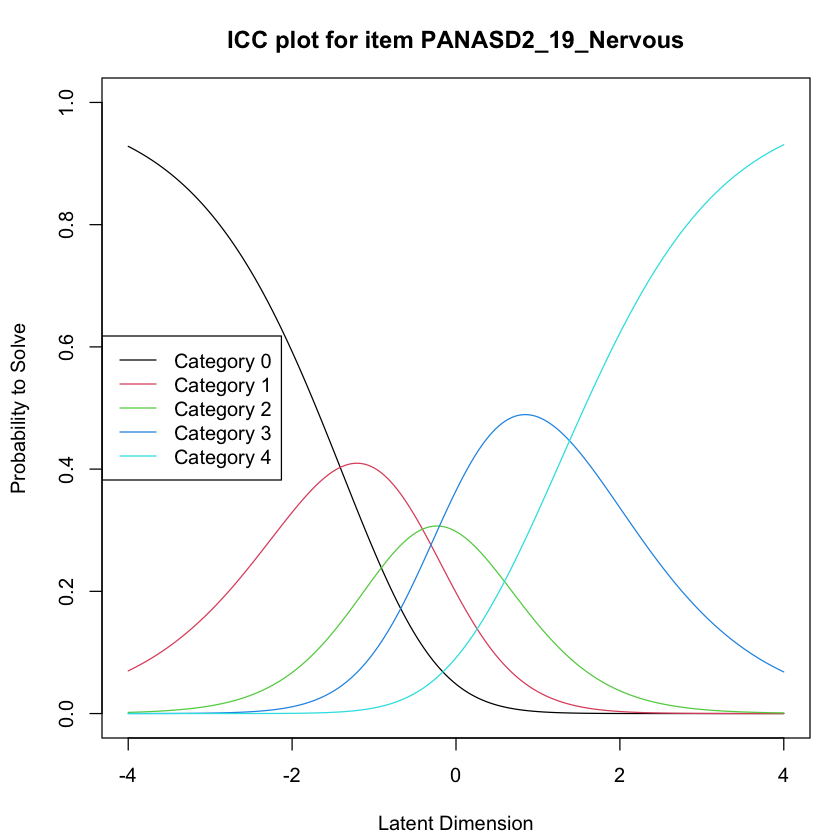

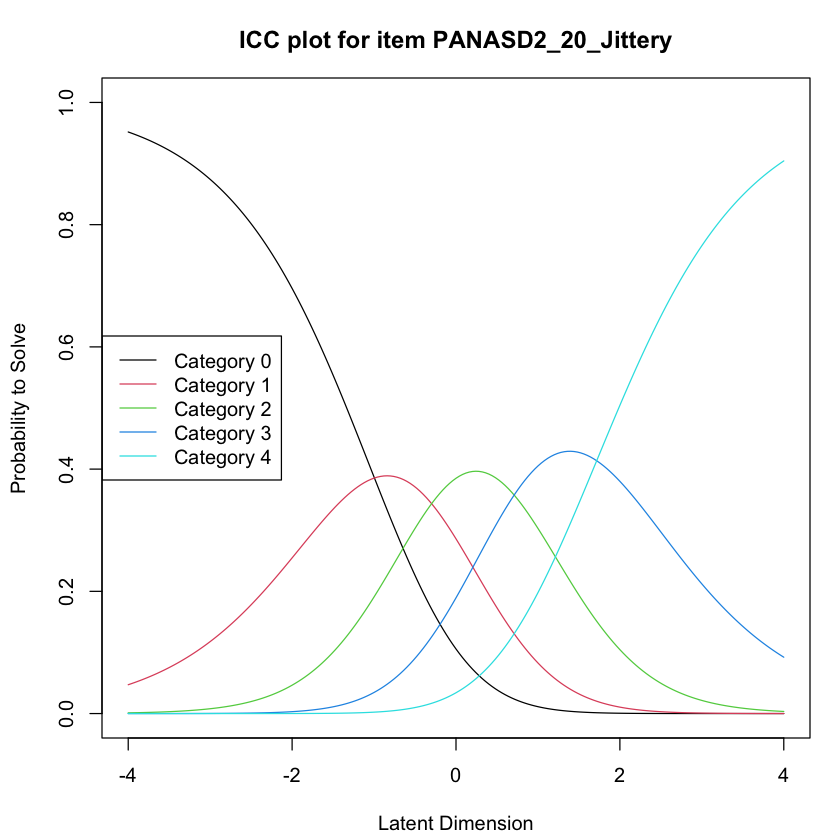

In [23]:
plotICC(PC_model, ask = FALSE)

Consideriamo ora le stime delle posizioni e delle soglie degli item all'interno del modello. 

Nell'output, la colonna "Location" indica la posizione media o la difficoltà dell'item. Un valore più alto indica un item più difficile, mentre un valore più basso indica un item più facile.

In [24]:
item.estimates <- thresholds(PC_model)
item.estimates


Design Matrix Block 1:
                      Location Threshold 1 Threshold 2 Threshold 3 Threshold 4
PANASD2_11_Distressed  0.00005    -1.35320    -0.36571     0.12391     1.59521
PANASD2_12_Upset       0.27628    -0.52011    -0.07450     0.41611     1.28361
PANASD2_13_Hostile     0.76796     0.00072     0.18782     0.94115     1.94217
PANASD2_14_Irritable   0.01274    -1.10091    -0.28394     0.18435     1.25147
PANASD2_15_Scared      0.49253    -0.16253     0.06943     0.42199     1.64124
PANASD2_16_Afraid      0.33631    -0.30226    -0.11453     0.29375     1.46830
PANASD2_17_Ashamed     0.69454     0.23456     0.35403     0.84989     1.33967
PANASD2_18_Guilty      0.63312     0.19723     0.19272     0.63936     1.50319
PANASD2_19_Nervous    -0.15968    -1.41302    -0.40902    -0.20215     1.38548
PANASD2_20_Jittery     0.28340    -0.99534    -0.29755     0.70963     1.71687


Nell'output, le colonne "Threshold 1" e "Threshold 2" rappresentano le soglie tra le categorie di risposta per ciascun item. Queste soglie indicano i punti lungo la scala di abilità in cui un rispondente ha probabilità uguali di essere classificato nella categoria successiva rispetto alla categoria corrente. Ad esempio, la soglia tra le categorie 0 e 1, e tra le categorie 1 e 2, ecc.

In [13]:
item_difficulty <- item.estimates[["threshtable"]][["1"]]
item_difficulty

,Location,Threshold 1,Threshold 2,Threshold 3,Threshold 4
PANASD2_11_Distressed,0.0000517478,-1.3531963437,-0.36571142,0.1239081,1.595207
PANASD2_12_Upset,0.2762772355,-0.5201061731,-0.07450431,0.4161086,1.283611
PANASD2_13_Hostile,0.7679628440,0.0007189619,0.18781823,0.9411459,1.942168
PANASD2_14_Irritable,0.0127449285,-1.1009053929,-0.28393583,0.1843502,1.251471
PANASD2_15_Scared,0.4925314892,-0.1625330801,0.06943123,0.4219868,1.641241
PANASD2_16_Afraid,0.3363140139,-0.3022642248,-0.11453302,0.2937533,1.468300
PANASD2_17_Ashamed,0.6945389852,0.2345645556,0.35402783,0.8498946,1.339669
PANASD2_18_Guilty,0.6331246731,0.1972308144,0.19272262,0.6393579,1.503187
PANASD2_19_Nervous,-0.1596779644,-1.4130204613,-0.40902182,-0.2021472,1.385478
PANASD2_20_Jittery,0.2834008554,-0.9953371588,-0.29755008,0.7096253,1.716865


Consideriamo ora gli errori standard associati alle stime delle soglie. Questi valori indicano la variabilità o l'incertezza nelle stime delle soglie per ogni item e categoria di risposta. Un errore standard più piccolo indica una stima più precisa, mentre un errore standard più grande suggerisce una maggiore incertezza nella stima.

In [25]:
item.se <- item.estimates$se.thresh
print(item.se)

thresh beta PANASD2_11_Distressed.c1 thresh beta PANASD2_11_Distressed.c2 
                          0.06827825                           0.07302255 
thresh beta PANASD2_11_Distressed.c3 thresh beta PANASD2_11_Distressed.c4 
                          0.08581654                           0.14386507 
     thresh beta PANASD2_12_Upset.c1      thresh beta PANASD2_12_Upset.c2 
                          0.06495804                           0.08166026 
     thresh beta PANASD2_12_Upset.c3      thresh beta PANASD2_12_Upset.c4 
                          0.10244689                           0.15286677 
   thresh beta PANASD2_13_Hostile.c1    thresh beta PANASD2_13_Hostile.c2 
                          0.06457093                           0.08828441 
   thresh beta PANASD2_13_Hostile.c3    thresh beta PANASD2_13_Hostile.c4 
                          0.12576093                           0.23697526 
 thresh beta PANASD2_14_Irritable.c1  thresh beta PANASD2_14_Irritable.c2 
                         

Le stime delle abilità dei partecipanti si ottengono nel modo seguente:

In [26]:
person.locations.estimate <- person.parameter(PC_model)
summary(person.locations.estimate)


Estimation of Ability Parameters

Collapsed log-likelihood: -423.5978 
Number of iterations: 17 
Number of parameters: 37 

ML estimated ability parameters (without spline interpolated values): 
               Estimate Std. Err.       2.5 %      97.5 %
theta P1    -2.31045242 0.7121583 -3.70625702 -0.91464782
theta P2    -2.31045242 0.7121583 -3.70625702 -0.91464782
theta P3     0.04903314 0.2926711 -0.52459159  0.62265786
theta P5    -1.89795201 0.5833316 -3.04126085 -0.75464316
theta P6     0.64789700 0.2998625  0.06017724  1.23561675
theta P7    -0.31068888 0.3100575 -0.91839035  0.29701258
theta P8    -2.31045242 0.7121583 -3.70625702 -0.91464782
theta P9    -1.89795201 0.5833316 -3.04126085 -0.75464316
theta P10    0.13414117 0.2909458 -0.43610207  0.70438441
theta P11   -1.37225324 0.4562369 -2.26646119 -0.47804529
theta P12    0.21851432 0.2901400 -0.35014955  0.78717818
theta P13   -2.31045242 0.7121583 -3.70625702 -0.91464782
theta P14   -0.40911877 0.3176466 -1.03169464  0.2

I valori "Estimate" indicano dove si posiziona il rispondente sulla scala di abilità rispetto agli altri. Un valore più alto indica un'abilità maggiore.  L'errore standard ("Std. Err.") associato a ciascuna stima di abilità indica l'incertezza o la variabilità di quella stima. Un errore standard più piccolo suggerisce una maggiore precisione nella stima dell'abilità, mentre un errore standard più grande indica una maggiore incertezza. L'intervallo di confidenza dà un'idea di dove potrebbe effettivamente cadere il vero valore dell'abilità del rispondente, con un livello di confidenza del 95%. 

Esaminiamo gli indici outfit e infit per valutare quanto bene ciascun item si adatta al modello utilizzato. 

In [27]:
item.fit <- eRm::itemfit(person.locations.estimate)
item.fit


Itemfit Statistics: 
                         Chisq   df p-value Outfit MSQ Infit MSQ Outfit t
PANASD2_11_Distressed 1873.735 1632   0.000      1.147     1.106    3.755
PANASD2_12_Upset      1267.605 1632   1.000      0.776     0.776   -4.972
PANASD2_13_Hostile    2022.459 1632   0.000      1.238     1.093    3.762
PANASD2_14_Irritable  1647.341 1632   0.390      1.009     0.978    0.231
PANASD2_15_Scared     1083.465 1632   1.000      0.663     0.724   -6.796
PANASD2_16_Afraid     1158.383 1632   1.000      0.709     0.735   -6.103
PANASD2_17_Ashamed    1371.951 1632   1.000      0.840     0.873   -2.492
PANASD2_18_Guilty     1730.496 1632   0.044      1.060     0.999    0.908
PANASD2_19_Nervous    1374.307 1632   1.000      0.842     0.842   -4.432
PANASD2_20_Jittery    1895.797 1632   0.000      1.161     1.123    3.808
                      Infit t Discrim
PANASD2_11_Distressed   3.017   0.533
PANASD2_12_Upset       -6.556   0.724
PANASD2_13_Hostile      2.249   0.519
PANASD2_14_I

Il valore Chi-Quadrato è un test statistico che misura quanto le osservazioni si discostano dalle aspettative sotto il modello. Un valore più alto indica una maggiore discrepanza. Il p-value è associato al test Chi-Quadrato. Un p-value alto (tipicamente > 0.05) suggerisce che l'item si adatta bene al modello, mentre un p-value basso indica un cattivo adattamento. Outfit MSQ (Mean Square Error) misura la sensibilità alle osservazioni anomale o ai valutatori che si comportano in modo imprevedibile. Valori vicini a 1 indicano un buon adattamento; valori molto più alti o più bassi di 1 indicano un adattamento povero. L'indice Infit MSQ (Mean Square Error) è simile all'Outfit MSQ, ma meno sensibile alle osservazioni anomale. Anche qui, valori vicini a 1 sono desiderabili. I valori Outfit t e Infit t sono i punteggi t standardizzati per Outfit e Infit MSQ. Un punteggio t che si discosta molto da 0 (sia positivamente che negativamente) indica un adattamento povero. La discriminazione misura quanto bene l'item distingue tra rispondenti con diversi livelli di abilità. Valori più alti indicano una migliore discriminazione.

In generale, possiamo dire che gli item mostrano un buon adattamento al modello. I loro valori Outfit e Infit MSQ sono vicini a 1 e hanno p-value alti nel test Chi-Quadrato. L'item 11 mostra invece segni di un cattivo adattamento. La discriminazione varia molto poco tra gli item. Questo significa che questo set di item non ha una buona capacità di distinguere tra rispondenti di diversa abilità.

Esaminiamo ora le statistiche di adattamento dei rispondenti:

In [36]:
item.fit.table <- cbind(item.fit[["i.outfitMSQ"]], item.fit[["i.infitMSQ"]], item.fit[["i.infitMSQ"]], item.fit[["i.infitZ"]])
pfit <- eRm::personfit(person.locations.estimate)
pfit


Personfit Statistics: 
       Chisq df p-value Outfit MSQ Infit MSQ Outfit t Infit t
P1    11.656  9   0.233      1.166     0.826     0.49    0.06
P2     4.771  9   0.854      0.477     0.647    -0.35   -0.20
P3     5.589  9   0.780      0.559     0.555    -1.33   -1.35
P5     3.189  9   0.956      0.319     0.390    -0.88   -0.87
P6     9.732  9   0.373      0.973     0.842     0.06   -0.30
P7     8.427  9   0.492      0.843     0.844    -0.28   -0.29
P8    13.446  9   0.143      1.345     1.751     0.64    1.01
P9     5.673  9   0.772      0.567     0.662    -0.35   -0.29
P10    8.343  9   0.500      0.834     0.767    -0.36   -0.58
P11    4.128  9   0.903      0.413     0.410    -0.94   -1.09
P12    8.392  9   0.495      0.839     0.870    -0.35   -0.26
P13    3.667  9   0.932      0.367     0.536    -0.55   -0.38
P14   16.543  9   0.056      1.654     1.716     1.46    1.59
P15    8.684  9   0.467      0.868     0.863    -0.19   -0.21
P17   11.181  9   0.264      1.118     1.038  

- Chisq: Misura quanto le risposte del rispondente si discostano dalle aspettative del modello. Un valore più alto suggerisce una maggiore discrepanza. 
- df: Indica i gradi di libertà per il test del Chi-Quadrato.
- p-value: Associa un valore di probabilità al risultato del Chi-Quadrato. Un p-value alto (tipicamente > 0.05) indica un buon adattamento del rispondente al modello. Un p-value basso suggerisce un cattivo adattamento.
- Outfit MSQ (Mean Square Error): Media quadratica ponderata basata su tutte le risposte del rispondente. Valori vicini a 1 indicano un buon adattamento; valori molto alti o molto bassi indicano un cattivo adattamento.
- Infit MSQ (Mean Square Error): Simile all'Outfit, ma dà più peso alle risposte che sono più informative per la stima dell'abilità del rispondente.
- Outfit t e Infit t: Questi sono i punteggi t standardizzati per Outfit e Infit MSQ. Un punteggio t che si discosta molto da 0 (in senso positivo o negativo) indica un adattamento povero.

### Il Modello a Scala di Valutazione 

Il Modello a Scala di Valutazione (Rating Scale Model, RSM), introdotto da Andrich nel 1978, rappresenta una versione specifica e più restrittiva del Modello a Crediti Parziali (Partial Credit Model, PCM). La caratteristica distintiva del RSM è l'uniformità nella scala di risposta: questo modello presume che tutti gli item di un test utilizzino esattamente la stessa scala di valutazione, con un numero identico di categorie di risposta e con interpretazioni equivalenti per queste categorie in tutti gli item.

Ad esempio, in un questionario dove ogni domanda presenta quattro opzioni di risposta - "mai", "qualche volta", "spesso", "sempre" - il RSM assumerà che il passaggio da "mai" a "qualche volta" abbia lo stesso significato e la stessa "distanza" interpretativa in ogni domanda del questionario. La stessa logica si applica alle transizioni tra le altre categorie di risposta.

D'altro canto, il PCM offre una flessibilità maggiore. In questo modello, ogni item nel test può avere un numero diverso di categorie di risposta, e la significanza di queste categorie può variare da un item all'altro. Ad esempio, una domanda potrebbe avere tre opzioni di risposta, mentre un'altra nello stesso test potrebbe presentarne cinque. Le soglie, ovvero i punti di transizione tra le categorie di risposta, possono essere diversi per ogni item.

In sostanza, il RSM è un sottocaso del PCM in cui si applica una struttura di risposta standardizzata per tutti gli item: stesse categorie di risposta, stesso numero di queste categorie, e stesse soglie tra le categorie. Mentre il PCM si adatta alle peculiarità di ciascun item, offrendo una maggiore varietà e adattabilità, il RSM adotta un approccio più uniforme e strutturato, imponendo la stessa scala di valutazione a tutti gli item del test.

## Modello a Crediti Parziali Generalizzato

Il Modello a Crediti Parziali Generalizzato (Generalized Partial Credit Model, GPCM) è una versione estesa e più versatile del Modello a Crediti Parziali (Partial Credit Model, PCM). Sviluppato per affrontare alcune limitazioni del PCM e del RSM (Rating Scale Model), il GPCM offre un quadro analitico ancora più flessibile per gestire una varietà di formati di risposta nei test.

Simile al PCM, nel GPCM, ogni item in un test può avere un numero diverso di categorie di risposta. Questa caratteristica lo rende particolarmente adatto per test che includono item con formati di risposta variabili.

A differenza del RSM, che impone la stessa struttura di risposta su tutti gli item, il GPCM permette che ogni item abbia le proprie soglie specifiche. Questo significa che la transizione da una categoria di risposta all'altra può avere significati diversi per item differenti.

Una caratteristica distintiva del GPCM è che permette a ciascun item di avere il proprio parametro di discriminazione. Questo parametro misura quanto efficacemente un item distingue tra rispondenti con livelli diversi di abilità. In altre parole, mentre il PCM assume che tutti gli item abbiano la stessa capacità di discriminazione, il GPCM riconosce che alcuni item possono essere più informativi di altri nel distinguere tra rispondenti.

Il GPCM è particolarmente utile in contesti di test dove gli item variano significativamente in termini di formato, difficoltà e capacità di discriminazione. Ad esempio, in un test educativo, alcune domande potrebbero essere più efficaci nell'identificare studenti con abilità elevate, mentre altre potrebbero essere migliori nel differenziare tra studenti con abilità più basse. Il GPCM permette di modellare questa varietà in modo più accurato e preciso rispetto al PCM o al RSM.

In sintesi, il Generalized Partial Credit Model rappresenta un avanzamento significativo nella teoria della risposta all'item, fornendo una struttura flessibile e adattabile che può essere calibrata per adattarsi alle specifiche caratteristiche di ciascun item in un test. Questa flessibilità lo rende uno strumento prezioso per analisi psicometriche complesse e per la creazione di test che riflettano accuratamente le diverse sfumature delle abilità dei rispondenti.

## Modello di Risposta Nominale

Il Modello di Risposta Nominale (Nominal Response Model, NRM) è un'altra variante nella famiglia dei modelli della teoria della risposta all'item (Item Response Theory, IRT). A differenza dei modelli precedentemente menzionati, come il Generalized Partial Credit Model (GPCM) o il Partial Credit Model (PCM), il NRM è specificamente progettato per analizzare dati di risposta dove le categorie non hanno un ordinamento o una gerarchia naturale. Questo lo rende particolarmente adatto per item con risposte nominali.

Nel NRM, le categorie di risposta per ogni item sono trattate come nominali, il che significa che non esiste un ordine intrinseco o una scala di valutazione. Ad esempio, in un questionario che chiede il colore preferito (rosso, verde, blu, ecc.), non c'è un ordine naturale tra le scelte.

Ogni categoria di risposta all'interno di un item ha il suo parametro unico. Questo approccio differisce dai modelli come il PCM, dove le categorie sono ordinate e hanno soglie specifiche per l'item. Nel NRM, ogni scelta risposta è indipendente e ha il proprio parametro che descrive la probabilità che un rispondente con una certa abilità scelga quella categoria.

Mentre modelli come il PCM o il GPCM presuppongono una struttura ordinale nelle risposte, il NRM non fa tale assunzione, rendendolo ideale per item dove le risposte sono categoriche e non ordinabili.

Il Modello di Risposta Nominale trova applicazione in situazioni di test dove le risposte degli item sono categoriche e non esiste un ordine logico o una scala di preferenza tra le categorie. È utilizzato in ambiti come la ricerca di mercato, i sondaggi di opinione, e in contesti psicometrici dove le domande sono di natura qualitativa piuttosto che quantitativa.

In conclusione, il Nominal Response Model si distingue all'interno della teoria della risposta all'item per la sua capacità di gestire efficacemente dati di risposta nominale. Offre un metodo robusto e flessibile per analizzare risposte a scelta multipla dove le opzioni non implicano un gradimento o una preferenza ordinata, consentendo un'analisi dettagliata e accurata di item con risposte non ordinali.

## Modello di Risposta Graduata

Il Modello di Risposta Graduata (Graded Response Model, GRM), proposto da Samejima, si distingue per la sua capacità di gestire risposte che esprimono gradi o livelli, ad esempio, da "per niente d'accordo" a "completamente d'accordo".

A differenza del Modello a Crediti Parziali (Partial Credit Model, PCM), il GRM utilizza soglie cumulative per modellare le risposte. In questo contesto, ogni soglia indica il punto lungo la scala di abilità in cui un rispondente ha il 50% di probabilità di rispondere a un certo livello o a un livello superiore. Il GRM, quindi, si concentra sul calcolo delle probabilità cumulative di rispondere a un livello specifico o superiore su una scala ordinale fissa.

Il PCM, sviluppato da Masters, differisce significativamente dal GRM. Mentre il GRM è ideale per questionari con scale di risposta fisse e ordinate, il PCM offre una maggiore flessibilità nella gestione degli item. Ogni item nel PCM può avere un numero variabile di categorie di risposta, e ogni transizione tra queste categorie è modellata separatamente, permettendo di calcolare la probabilità di rispondere in una specifica categoria.

Questa differenza rende il PCM particolarmente adatto per valutare risposte che possono variare in termini di correttezza o completezza, come in un test educativo dove le risposte possono essere completamente corrette, parzialmente corrette, o completamente errate. In confronto, il GRM è più comunemente impiegato in ricerche psicologiche e sondaggi dove le risposte riflettono gradi di accordo, soddisfazione, o intensità di un sentimento, su una scala ordinale fissa.

In sintesi, mentre il PCM si adatta bene ai test che richiedono una valutazione dettagliata e specifica di risposte con diverse gradazioni di correttezza, il GRM è più efficace in situazioni dove le risposte sono espressivamente ordinali e scalari, fornendo una misura accurata di gradi o livelli di un tratto o di un'abilità.

## Modello Sequenziale

Il Modello Sequenziale (Sequential Model), sviluppato da Tutz nel 1990 e ulteriormente elaborato nel 1997, è un approccio innovativo nella teoria della risposta all'item (IRT) per analizzare dati di test con risposte ordinate, in particolare quando le risposte possono essere considerate come il risultato di un processo decisionale sequenziale.

Il Modello Sequenziale si basa sull'idea che le risposte a un item siano il risultato di una serie di decisioni. Invece di scegliere direttamente tra diverse categorie di risposta, si presume che i rispondenti passino attraverso una sequenza di passaggi decisionali, con ogni passaggio che porta a una scelta tra due alternative.

Il modello considera la risposta a un item come una serie di decisioni binarie (sì/no). Ad esempio, in un test a scelta multipla, un rispondente potrebbe prima decidere se una risposta è corretta o errata, e poi, se errata, scegliere tra le opzioni rimanenti.

Ogni passaggio decisionale nella sequenza è modellato separatamente. Questo permette una comprensione più dettagliata di come i rispondenti arrivino alla loro scelta finale.

Il modello è particolarmente utile per item complessi dove la risposta finale è il risultato di una serie di considerazioni o giudizi.

Immaginiamo un questionario per la valutazione di un corso. I partecipanti potrebbero prima decidere se il corso è stato generale positivo o negativo (primo stadio decisionale). Se positivo, potrebbero poi decidere se è stato "buono" o "eccellente" (secondo stadio). Se negativo, la scelta potrebbe essere tra "insufficiente" e "mediocre".

Il Modello Sequenziale trova applicazione in situazioni di test complesse, dove le risposte non sono semplicemente scelte tra categorie, ma il risultato di una serie di giudizi o valutazioni. Questo può includere valutazioni educative, sondaggi di opinione, e ricerche psicologiche.

In sintesi, il Modello Sequenziale di Tutz offre una prospettiva unica sull'analisi di risposte ordinate, enfatizzando il processo decisionale a più stadi che sta dietro la selezione di una risposta. 

## Dimensione del Campione

Nel contesto della teoria della risposta all'item (IRT) per dati politomici, la questione della grandezza del campione è fondamentale per garantire l'accuratezza e l'affidabilità delle stime dei parametri del modello. De Ayala (2009) ha fornito una panoramica delle ricerche riguardanti i requisiti di dimensione del campione per i modelli IRT, sia dicotomici che politomici, e ha offerto alcune linee guida utili.

1. **Numero di Categorie di Risposta:** Nei modelli politomici, il numero di categorie di risposta per item influisce significativamente sulla precisione della stima. Maggiore è il numero di categorie, maggiore sarà il numero complessivo di parametri dell'item da stimare.

2. **Distribuzione dei Parametri di Item e Persone:** Come nei modelli dicotomici, la forma e l'allineamento delle distribuzioni dei parametri di item e persone sono importanti. Una distribuzione ben bilanciata può contribuire a una stima più accurata.

De Ayala propone alcune regole empiriche per le dimensioni minime del campione nei modelli politomici:

- **Modello a Crediti Parziali e Modello a Scala di Valutazione:** Per questi modelli, è suggerita una dimensione minima del campione di circa 250 rispondenti. Questo è particolarmente pertinente per test che comprendono, ad esempio, 25 item con 5 categorie di risposta ciascuno.

- **Modello di Risposta Graduata:** Per il GRM, è raccomandata una dimensione del campione di circa 500 rispondenti, soprattutto quando si lavora con un numero elevato di item e categorie di risposta.

Problemi nella convergenza dell'algoritmo di stima e la presenza di errori standard elevati possono essere segnali che la dimensione del campione utilizzato non è sufficiente per una stima affidabile dei parametri del modello.

In sintesi, la scelta della grandezza del campione nei modelli IRT politomici deve considerare diversi fattori, inclusi il numero di item, il numero di categorie di risposta per item e il rapporto tra il numero di rispondenti e il numero di parametri dell'item da stimare. Seguendo le linee guida suggerite, i ricercatori possono assicurarsi di avere un campione di dimensioni adeguate per ottenere stime affidabili dei parametri del modello.

## Graded Response Model

Esaminiamo un altro esempio usando il Graded Response Model (GRM). Il GRM e il Modello a Crediti Parziali (PCM, Partial Credit Model) sono entrambi modelli utilizzati nella teoria della risposta al test (IRT, Item Response Theory) per analizzare i dati provenienti da risposte a item con formati di risposta politomici. Ecco una descrizione delle principali differenze tra i due modelli:

1. **Struttura delle risposte**:
   - **Graded Response Model (GRM)**: È particolarmente adatto per item con risposte ordinate, come scale Likert. In questo modello, ogni categoria di risposta ha una sua funzione di risposta a item (IRF, Item Response Function), che descrive la probabilità di rispondere a un certo livello o superiore, date le caratteristiche latenti del rispondente. L'assunzione fondamentale è che esista una soglia di difficoltà tra ciascun livello di risposta, e queste soglie sono stimate separatamente per ogni passaggio tra livelli di risposta.
   
   - **Modello a Crediti Parziali (PCM)**: Adatto per item che non hanno necessariamente risposte in un ordine naturale e può essere applicato a domande che valutano compiti dove i punteggi riflettono il grado di successo raggiunto in ogni item. Ad esempio, un item potrebbe permettere di guadagnare più "crediti" o punteggi a seconda della completezza o correttezza della risposta. Le soglie in PCM non sono tra le categorie di risposta ordinate, ma tra i livelli di crediti guadagnati; il modello stima una soglia per passare da un punteggio all'altro all'interno dello stesso item.

2. **Parametri stimati**:
   - **GRM**: Stima un parametro di discriminazione per item, che indica quanto bene l'item distingue tra individui con differenti livelli del tratto latente, e diversi parametri di difficoltà (soglie) per ciascun passaggio tra le categorie di risposta.
   
   - **PCM**: Stima un solo parametro di discriminazione per item (solitamente fissato a 1 in molti software IRT, rendendo il modello monoparametrico), e un set di parametri di difficoltà che rappresentano le soglie per ogni passaggio di credito all'interno dell'item.

3. **Applicabilità e interpretazione**:
   - **GRM**: È preferito quando le categorie di risposta sono chiaramente ordinate e il focus è su come gli individui superano diverse soglie di difficoltà per arrivare a risposte più elevate. L'interpretazione delle soglie è diretta: indicano il punto lungo il continuum del tratto latente dove la probabilità di scegliere una determinata risposta o superiore diventa più probabile che scegliere una risposta inferiore.
   
   - **PCM**: È utile quando le categorie di risposta rappresentano livelli di un compito, e il passaggio da un livello al successivo non è necessariamente ordinato o sequenziale. Questo modello può riflettere meglio situazioni in cui ogni parte di una risposta aggiunge "credito" alla valutazione finale, come nel caso di risposte a problemi aperti.

Carichiamo i dati. In questo caso, useremo dei dati forniti da Dienlin & Metzger (2016). I dati possono essere consultati tramite OSF (https://osf.io/bu74a/). Per questo tutorial, utilizzeremo solo 4 item per valutare le preoccupazioni per la "privacy online". Sono stati misurati su una scala a 5 punti che va da 1 = `fortemente in disaccordo` a 5 = `fortemente d'accordo`. Diverse risposte sono state codificate al contrario (esempio di item: "Non sono particolarmente preoccupato per la mia privacy online")."

In [38]:
d <- read.csv("https://osf.io/bu74a/download", header = TRUE, na.strings = "NA") %>%
    as_tibble() %>%
    select(PRI.CON_1:PRI.CON_4) %>%
    na.omit()

head(d)

PRI.CON_1,PRI.CON_2,PRI.CON_3,PRI.CON_4
<int>,<int>,<int>,<int>
4,5,4,4
1,1,1,4
2,4,4,4
3,3,2,3
3,4,3,2
3,2,2,2


Per adattare il modello, possiamo nuovamente utilizzare la funzione `mirt()` e indicare che il tipo di item è "graded".

In [39]:
fitGraded <- mirt(d, 1, itemtype = "graded")

Iteration: 28, Log-Lik: -5655.419, Max-Change: 0.00009


La funzione `summary()` produce la soluzione fattoriale.

In [43]:
# IRT solution
summary(fitGraded)

             F1    h2
PRI.CON_1 0.750 0.562
PRI.CON_2 0.811 0.658
PRI.CON_3 0.509 0.259
PRI.CON_4 0.623 0.388

SS loadings:  1.867 
Proportion Var:  0.467 

Factor correlations: 

   F1
F1  1


Confrontiamo la soluzione fattoriale precedente con quella ottenuta da un modello di analisi fattoriale confermativa.

In [42]:
fitCTT <- cfa("privacyconcerns =~ PRI.CON_1 + PRI.CON_2 + PRI.CON_3 + PRI.CON_4", data = d)

Esaminiamo le saturazioni fattoriali ottenuti usando `lavaan`.

In [44]:
# CTT solution
standardizedsolution(fitCTT) %>%
    filter(op == "=~") %>%
    select(rhs, F1 = est.std)

rhs,F1
<chr>,<dbl>
PRI.CON_1,0.6619346
PRI.CON_2,0.7372001
PRI.CON_3,0.4094663
PRI.CON_4,0.5155927


Possiamo vedere che i carichi fattoriali non sono completamente gli stessi, ma sono molto "simili". Ad esempio, l'item PRI.CON_2 ha il carico fattoriale più alto in entrambi gli approcci.

## Parametri IRT

In [45]:
params <- coef(fitGraded, IRTpars = TRUE, simplify = TRUE)
round(params$items, 2) # g = c = guessing parameter

,a,b1,b2,b3,b4
PRI.CON_1,1.93,-2.64,-1.46,-0.29,1.17
PRI.CON_2,2.36,-2.52,-0.86,0.08,1.33
PRI.CON_3,1.01,-3.37,-1.18,0.79,3.09
PRI.CON_4,1.35,-3.44,-1.78,0.31,2.26


Simile ai modelli più semplici come il 3PL, 2PL o 1PL, i valori dei parametri di pendenza (a) rappresentano una misura di quanto bene un item differenzia i rispondenti con diversi livelli del tratto latente. Valori più grandi, o pendenze più ripide, sono migliori per differenziare theta.

Tuttavia, a differenza dei modelli basati su elementi di risposta binari, ora vediamo quattro parametri di posizione (b) per ciascun item. Questi parametri di posizione o difficoltà dell'item sono interpretati come il valore di theta che corrisponde a una probabilità del 50% di rispondere a quella posizione o oltre su un item. Ci sono m-1 parametri di posizione dove m si riferisce al numero di categorie di risposta sulla scala di risposta (in questo caso, 5-1). I parametri di posizione indicano che le risposte coprivano un'ampia gamma del tratto latente. Possiamo anche già vedere che le opzioni di risposta coprono diverse gamme sul tratto latente. Questo è naturalmente atteso, con "fortemente in disaccordo" che copre naturalmente gamme più basse del tratto rispetto a, ad esempio, "fortemente d'accordo".

 ## Model fit, item fit, person fit

 Similmente ai modelli più semplici, possiamo esaminare gli indici di adattamento del modello, degli item e dei rispondenti.

In [46]:
M2(fitGraded, type = "C2", calcNULL = FALSE)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,9.198614,2,0.0100588,0.05689277,0.02360152,0.09627306,0.05602563,0.9725604,0.9908535


In [47]:
itemfit(fitGraded)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PRI.CON_1,84.79371,20,0.05397579,5.941459e-10
PRI.CON_2,71.89922,20,0.04830733,8.892285e-08
PRI.CON_3,113.67134,23,0.05954135,5.639827e-14
PRI.CON_4,88.75420,22,0.05223668,5.579187e-10


In [48]:
head(personfit(fitGraded))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4884694,-0.5628345,0.4313877,-0.6786124,0.7804337
2,2.6071496,1.7713153,2.6885891,1.8116753,-2.4191541
3,2.0549152,1.3384209,1.9163719,1.2241292,-1.1414576
4,0.2468627,-1.2931131,0.2976097,-1.1339466,1.0415338
5,1.1458430,0.4337343,1.0092718,0.2533523,-0.4394222
6,0.4218925,-0.7069409,0.4172608,-0.7520850,0.7638786


## Grafici Tipici

Le differenze tra i modelli IRT basati su dati dicotomici e un modello di risposta graduata diventano particolarmente chiare quando osserviamo i grafici di traccia e le curve di informazione sulla scala. Tecnicamente, possiamo utilizzare tutte le funzioni di grafico che abbiamo già conosciuto nel tutorial precedente, ma i risultati saranno leggermente diversi.

I grafici delle CCC sono particolarmente utili per esaminare le probabilità di rispondere a specifiche categorie nella scala di risposta di un item. Queste probabilità sono visualizzate graficamente nelle curve di risposta alle categorie mostrate di seguito (non come curve caratteristiche degli elementi come negli altri modelli IRT).

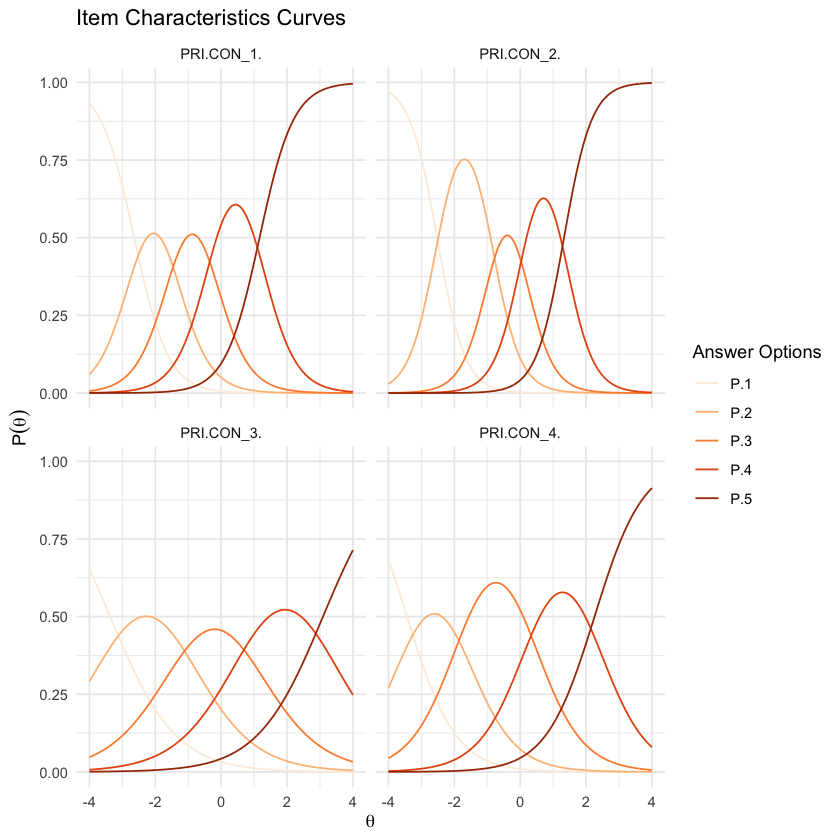

In [49]:
tracePlot(fitGraded) +
    labs(color = "Answer Options")

Queste curve hanno una chiara relazione con theta: Man mano che theta aumenta, la probabilità di approvare una categoria aumenta e poi diminuisce mentre le risposte passano alla categoria successiva più alta. Di nuovo, vediamo chiaramente che tutte le opzioni di risposta dell'item coprono un'ampia gamma del tratto latente.

## Curve di Informazione dell'Item

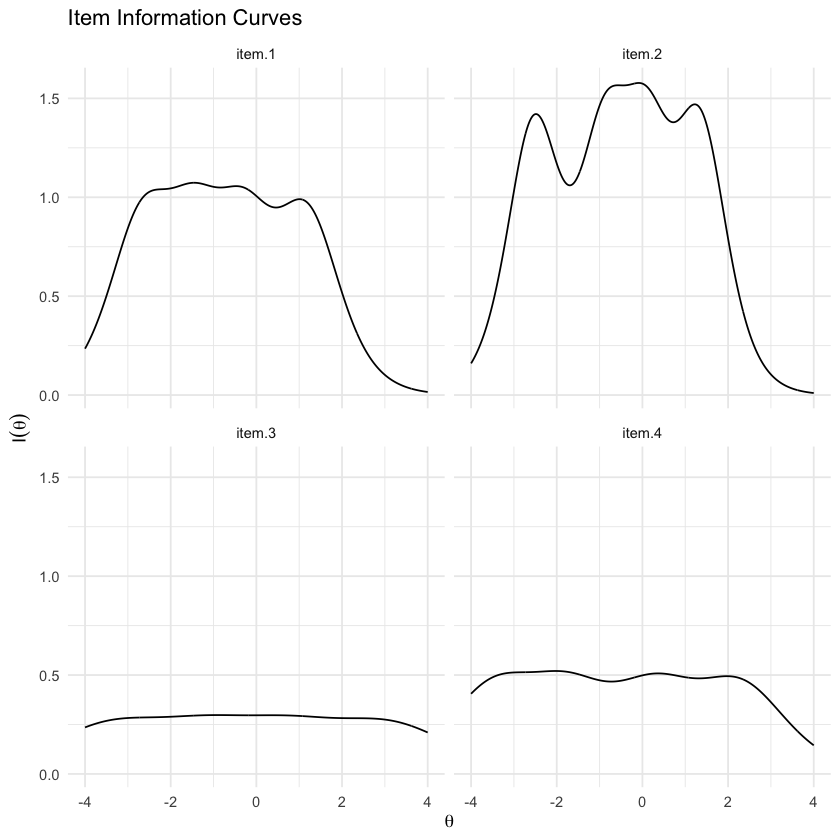

In [56]:
ggmirt::itemInfoPlot(fitGraded, facet = T)

Tramite i grafici delle curve di informazione degli item, possiamo anche vedere che non tutti gli item forniscono la stessa quantità di informazioni. Da queste curve, diventa chiaro che gli item 1 e 2 sono più adatti per misurare il tratto latente (qualcosa che abbiamo già notato nei carichi fattoriali più elevati).

## Test Information Curve

Una capacità particolarmente utile della teoria della risposta al test (IRT) è che le informazioni per singoli item possono essere sommate per formare una funzione di informazione della scala. Una funzione di informazione della scala è un riassunto di quanto bene gli item, nel complesso, forniscono informazioni statistiche sul tratto latente. Inoltre, i valori dell'informazione della scala possono essere utilizzati per calcolare gli errori standard condizionali che indicano con quanta precisione i punteggi possono essere stimati attraverso diversi valori di theta.

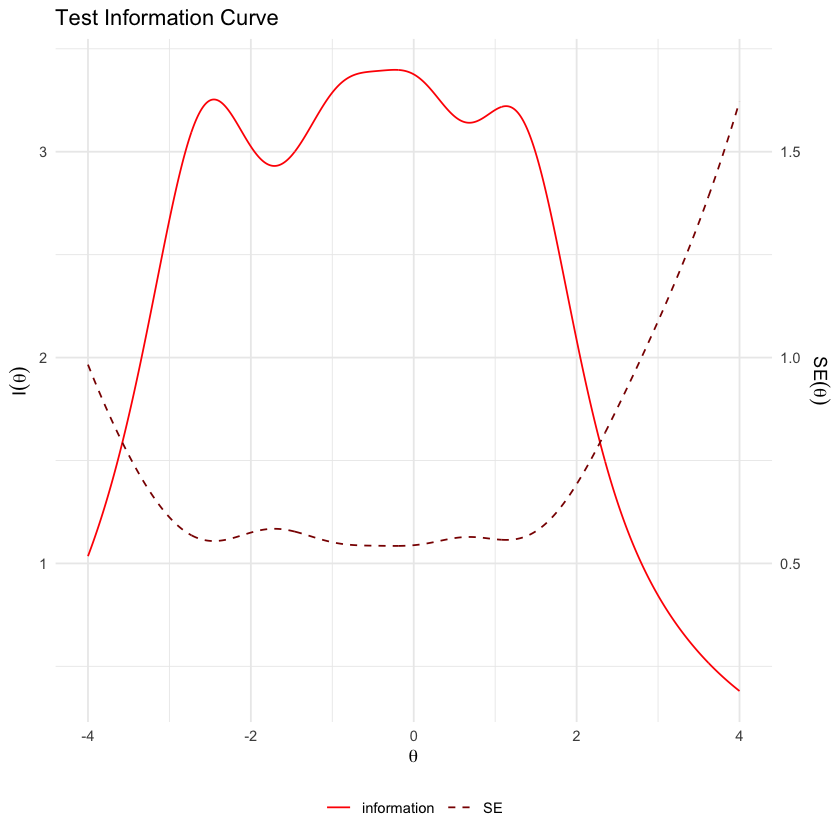

In [57]:
testInfoPlot(fitGraded, adj_factor = .5)

In maniera equivalente, possiamo usare le istruzioni seguenti:

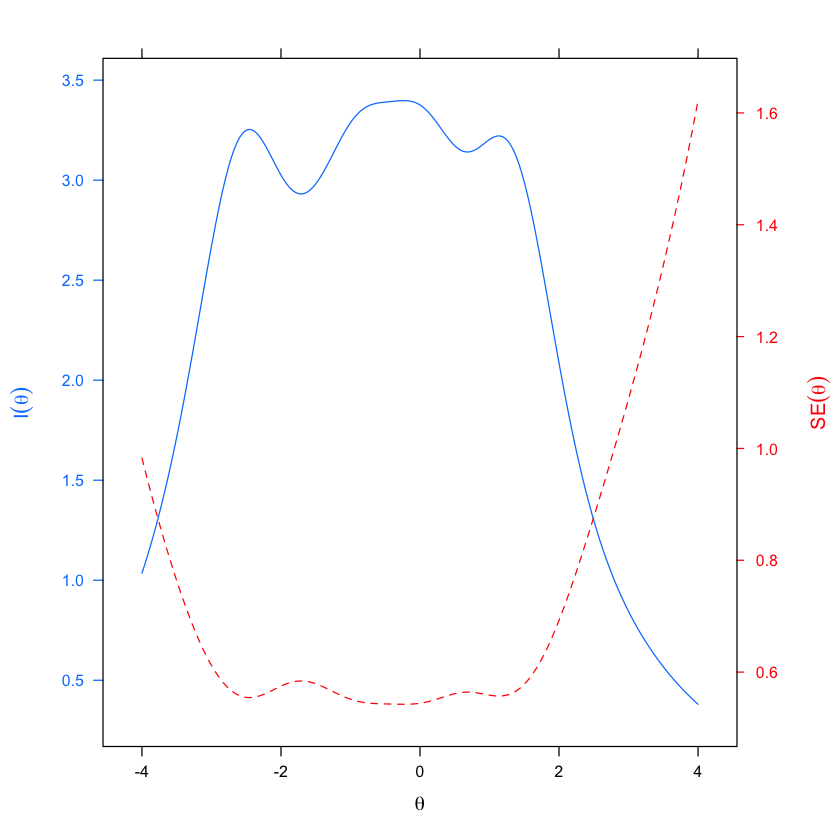

In [59]:
plot(fitGraded,
    type = "infoSE", theta_lim = c(-4, 4),
    main = ""
)

La relazione tra le informazioni sulla scala e gli errori standard condizionati è illustrata sopra. La linea blu continua rappresenta la funzione delle informazioni sulla scala. Complessivamente, la scala ha fornito il maggior numero di informazioni nell'intervallo da -4 a +4. La linea rossa fornisce un riferimento visivo su come la precisione dell'indice varia attraverso theta, con valori più piccoli che corrispondono a una migliore precisione dell'indice. Poiché gli errori standard condizionati riflettono matematicamente la curva delle informazioni sulla scala, la precisione stimata del punteggio è stata migliore nell'intervallo di theta da -3 a +2.

## Affidabilità condizionale

L'IRT affronta il concetto di affidabilità della scala in modo diverso rispetto all'approccio tradizionale della teoria dei test classici utilizzando coefficiente alpha o omega. L'approccio CTT assume che l'affidabilità si basi su un singolo valore che si applica a tutti i punteggi della scala.

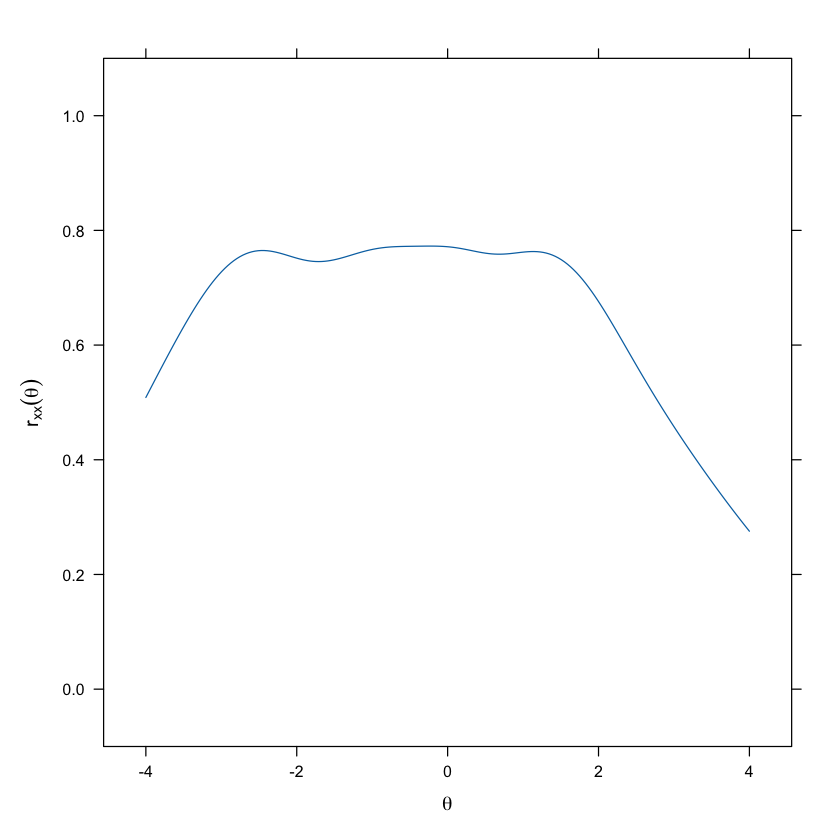

In [60]:
plot(fitGraded,
    type = "rxx", theta_lim = c(-4, 4),
    main = ""
)

Il concetto di affidabilità condizionale è illustrato sopra. Questa curva è matematicamente associata sia alle informazioni sulla scala che agli errori standard condizionati attraverso semplici trasformazioni. A causa di questa relazione, le stime dei punteggi sono più affidabili nell'intervallo di theta da -3 a +2.

È anche possibile calcolare una singola stima di affidabilità IRT. L'affidabilità marginale per la scala nel suo complesso è di 0.76.

In [62]:
marginal_rxx(fitGraded)

[1] 0.7589627

## Curva caratteristica della scala

Come prossimo passo, possiamo usare i parametri del modello per generare stime dei punteggi theta dei risponendti. Questi punteggi sono chiamati parametri della persona nell'IRT (vengono chiamati punteggi del fattore nella CFA). La funzione `mirt` usa una procedura di punteggio del tratto latente chiamata stima a posteriori attesa (EAP) per generare tali punteggi. Si tenga in considerazione che le stime sono nella metrica theta (normale standard) quindi possono essere interpretati come punteggi z. 

Una volta che le stime dei punteggi theta basate sul modello sono calcolate, spesso è di interesse trasformare tali stime nella metrica della scala originale. Una funzione caratteristica della scala fornisce un mezzo per trasformare i punteggi theta stimati in punteggi veri attesi nella metrica della scala originale. Questa trasformazione nella metrica della scala originale fornisce un quadro di riferimento più familiare per interpretare i punteggi. 

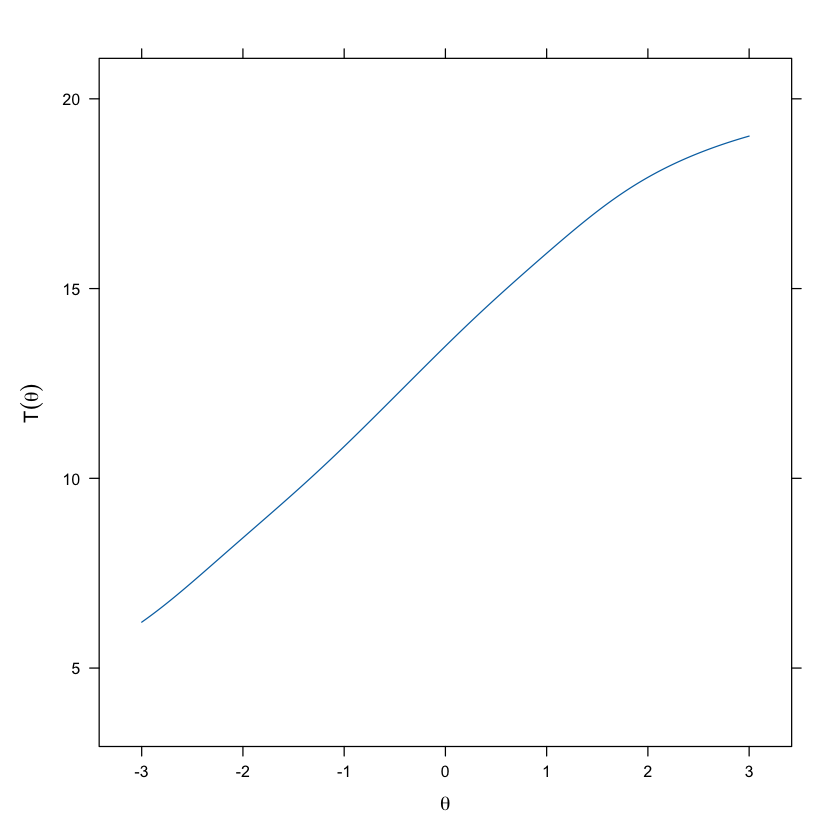

In [63]:
plot(fitGraded, type = "score", theta_lim = c(-3, 3), main = "")

La funzione caratteristica della scala può essere visualizzata graficamente come mostrato sopra. Ha un uso diretto; per qualsiasi punteggio theta stimato dato, possiamo facilmente trovare un punteggio vero atteso corrispondente nella metrica del punteggio sommato della scala. Queste trasformazioni dei punteggi veri sono spesso di interesse in situazioni pratiche in cui gli utenti della scala non sono familiari con i punteggi theta. 

## Confronto con i risultati della CFA

Ci possiamo chiedeere in che misura i risultati IRT differiscano da quelli ottenuti con una CFA. Possiamo semplicemente estrarre i punteggi fattoriali da entrambi i modelli e calcolre la correlazione.

In [58]:
cor.test(predict(fitCTT), fscores(fitGraded))


	Pearson's product-moment correlation

data:  predict(fitCTT) and fscores(fitGraded)
t = 286.75, df = 1111, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9924800 0.9940521
sample estimates:
      cor 
0.9933119 


Come si può vedere, sono quasi equivalenti. Un bel esempio di come due approcci diversi portino a una stima quasi identica del tratto latente.

## Session Info

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] kableExtra_1.4.0  latex2exp_0.9.6   WrightMap_1.3     psychotools_0.7-3
 [5] ggmirt_0.1.0      TAM_4.2-21        CDM_8.2-6         mvtnorm_1.2-4    
 [9] mirt_1.41         lattice_0.22-5    eRm_1.0-4         lubridate_1.9.3  
[13] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[17] readr_2.1.5       tidyr_1.3.1       tibble_3.2.1      ggplot2_3.4.4    
[21] tidyverse_2.0.0  

loaded via a namespace (and not attached):